In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import figure

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [60]:
df = pd.read_csv('mhealth.csv')
df.head()

,chest_accel_x,chest_accel_y,chest_accel_z,ecg_1,ecg_2,left_accel_x,left_accel_y,left_accel_z,left_gyro_x,left_gyro_y,...,right_accel_x,right_accel_y,right_accel_z,right_gyro_x,right_gyro_y,right_gyro_z,right_mag_x,right_mag_y,right_mag_z,activity
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


<br> L1: Standing still (1 min)              S
<br> L2: Sitting and relaxing (1 min)        S
<br> L3: Lying down (1 min)                  S
<br>
<br> L4: Walking (1 min)                     M 
<br> L5: Climbing stairs (1 min)             M
<br> L9: Cycling (1 min)                     M
<br> L10: Jogging (1 min)                    M
<br> L11: Running (1 min)                    M
<br> L12: Jump front & back (20x)            M
<br>
<br> L6: Waist bends forward (20x)           U
<br> L7: Frontal elevation of arms (20x)     U
<br> L8: Knees bending (crouching) (20x)     U

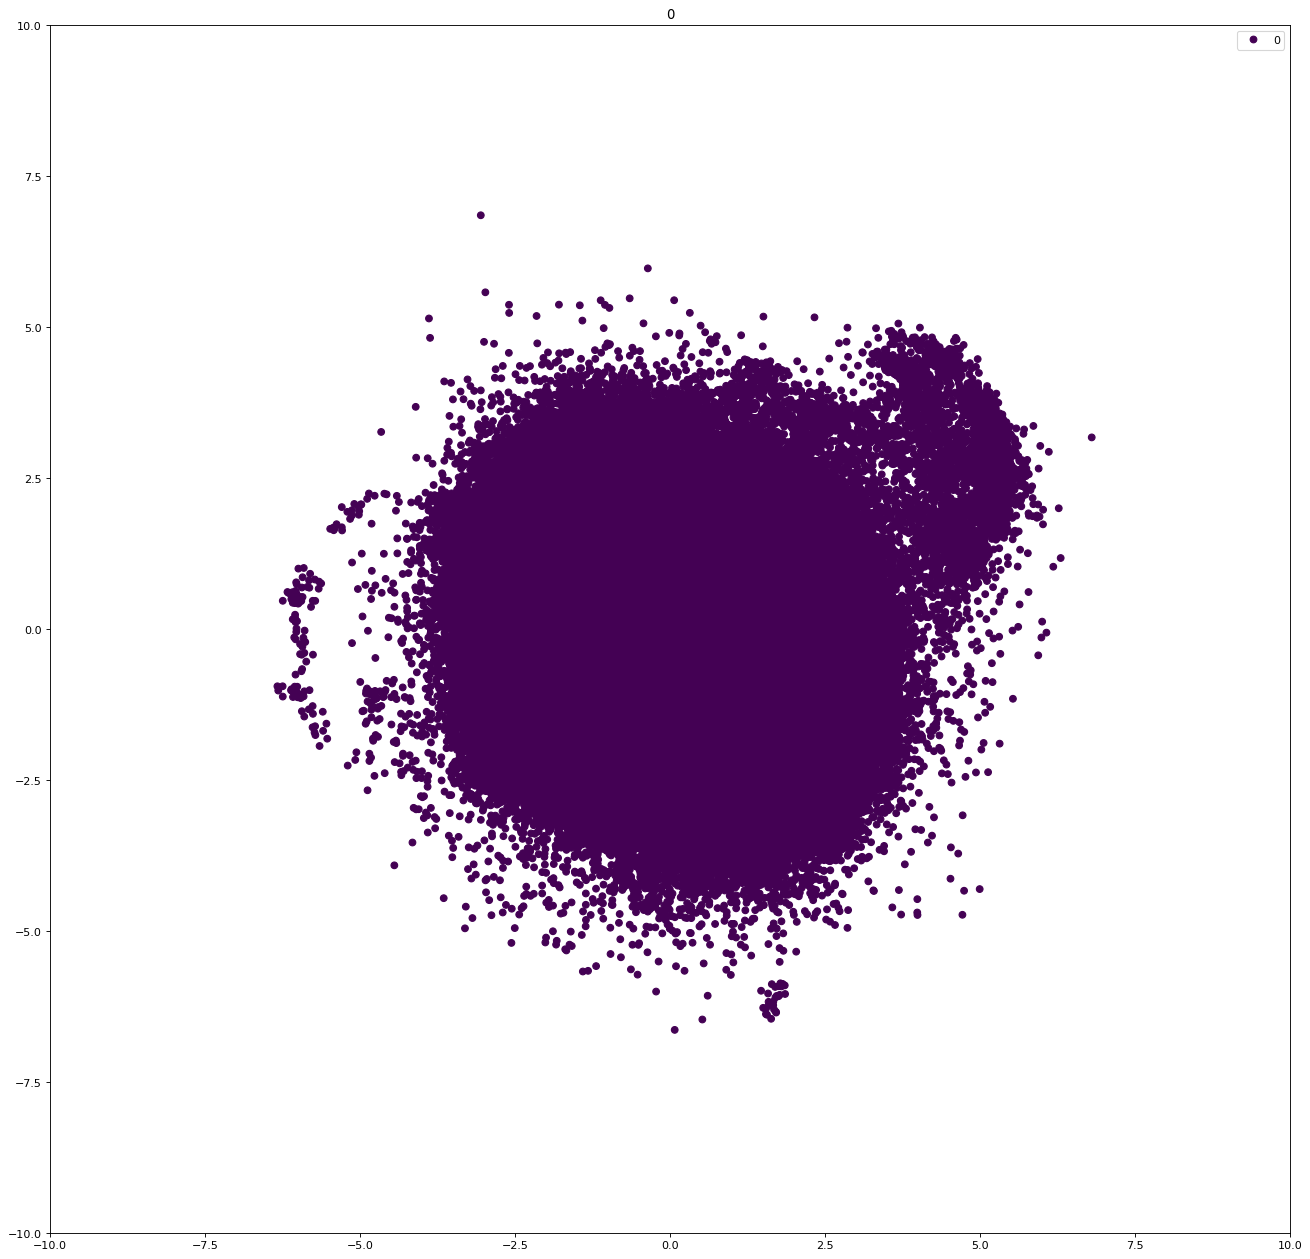

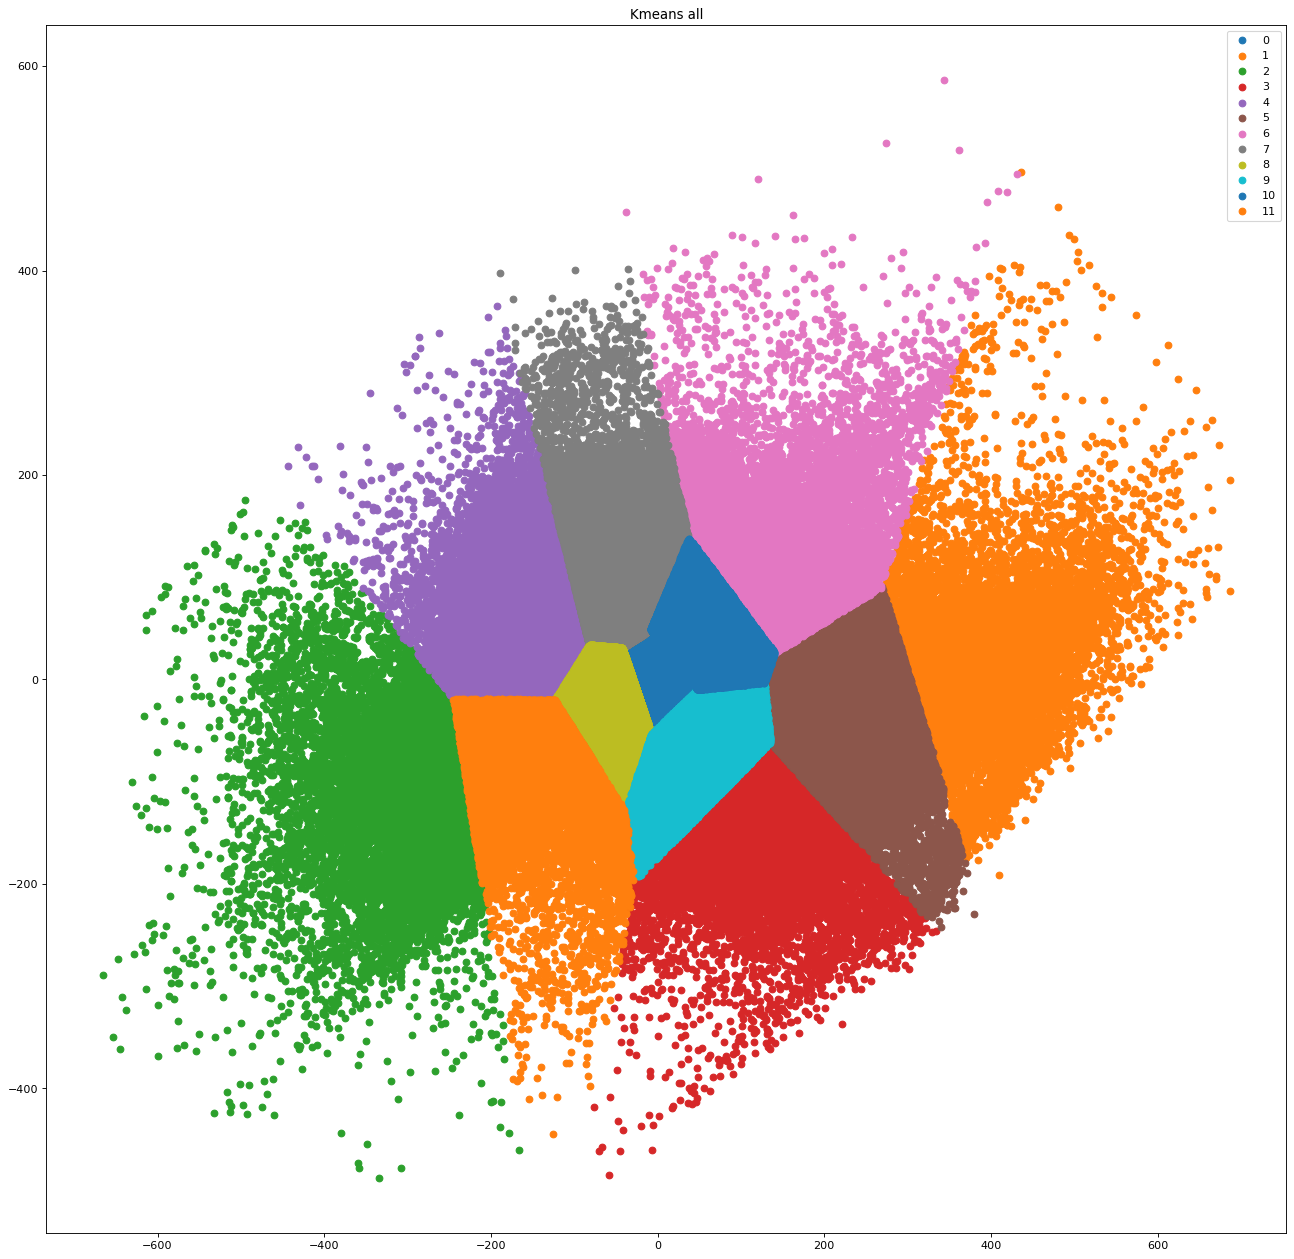

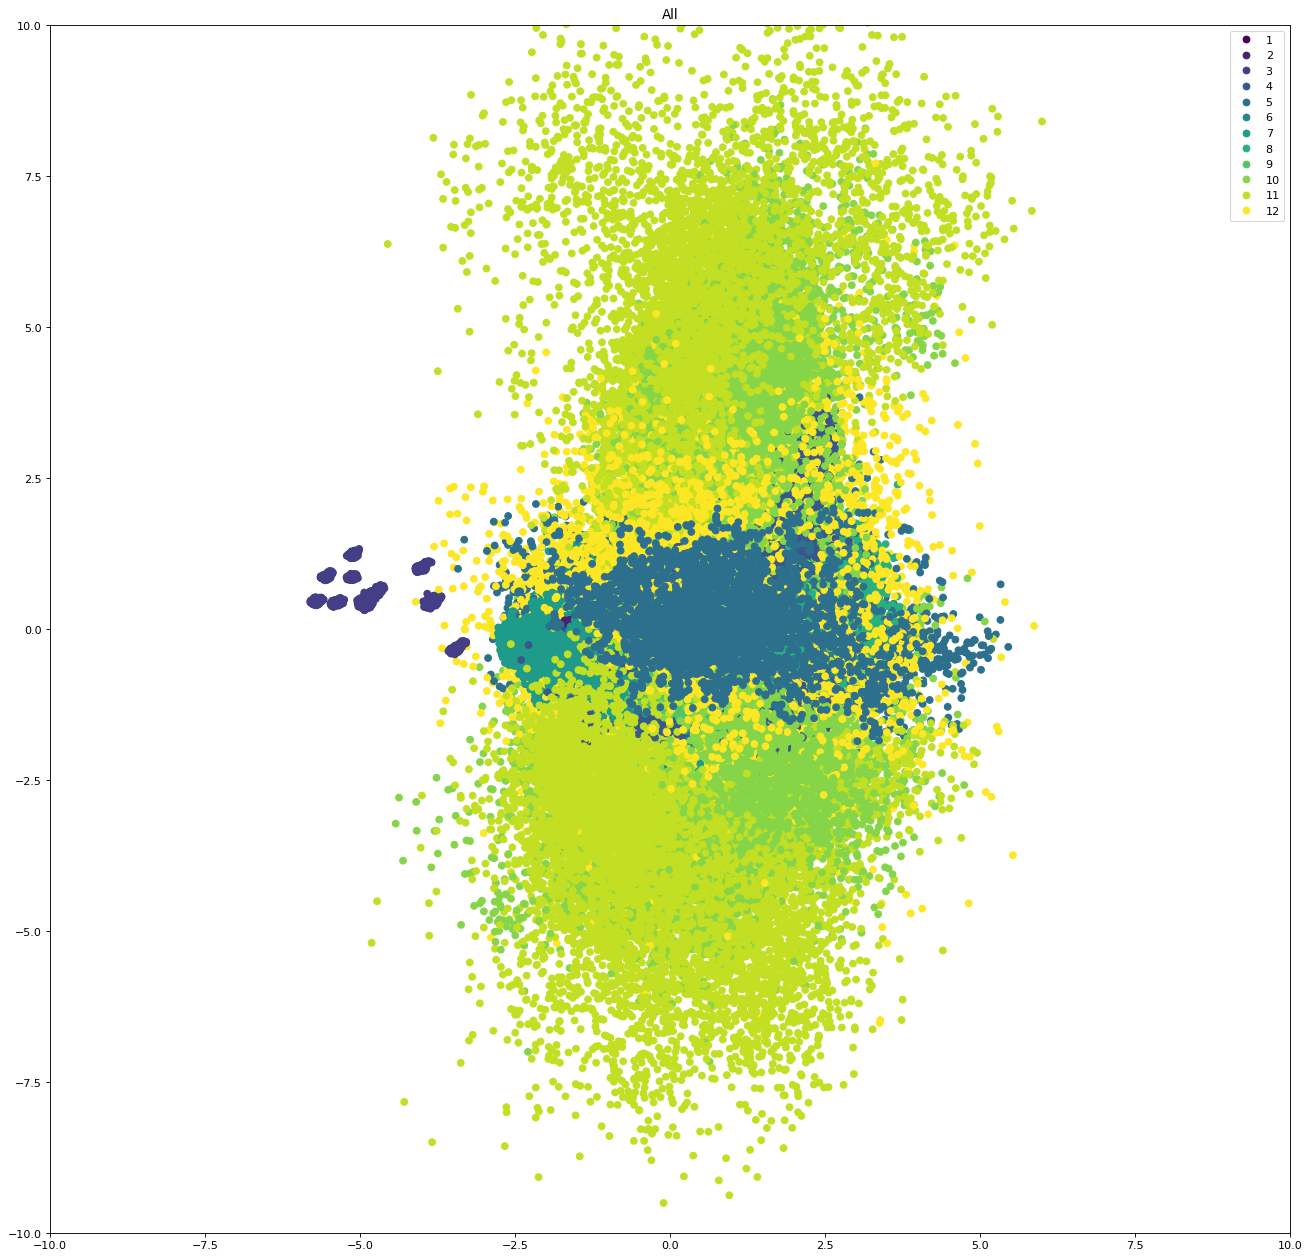

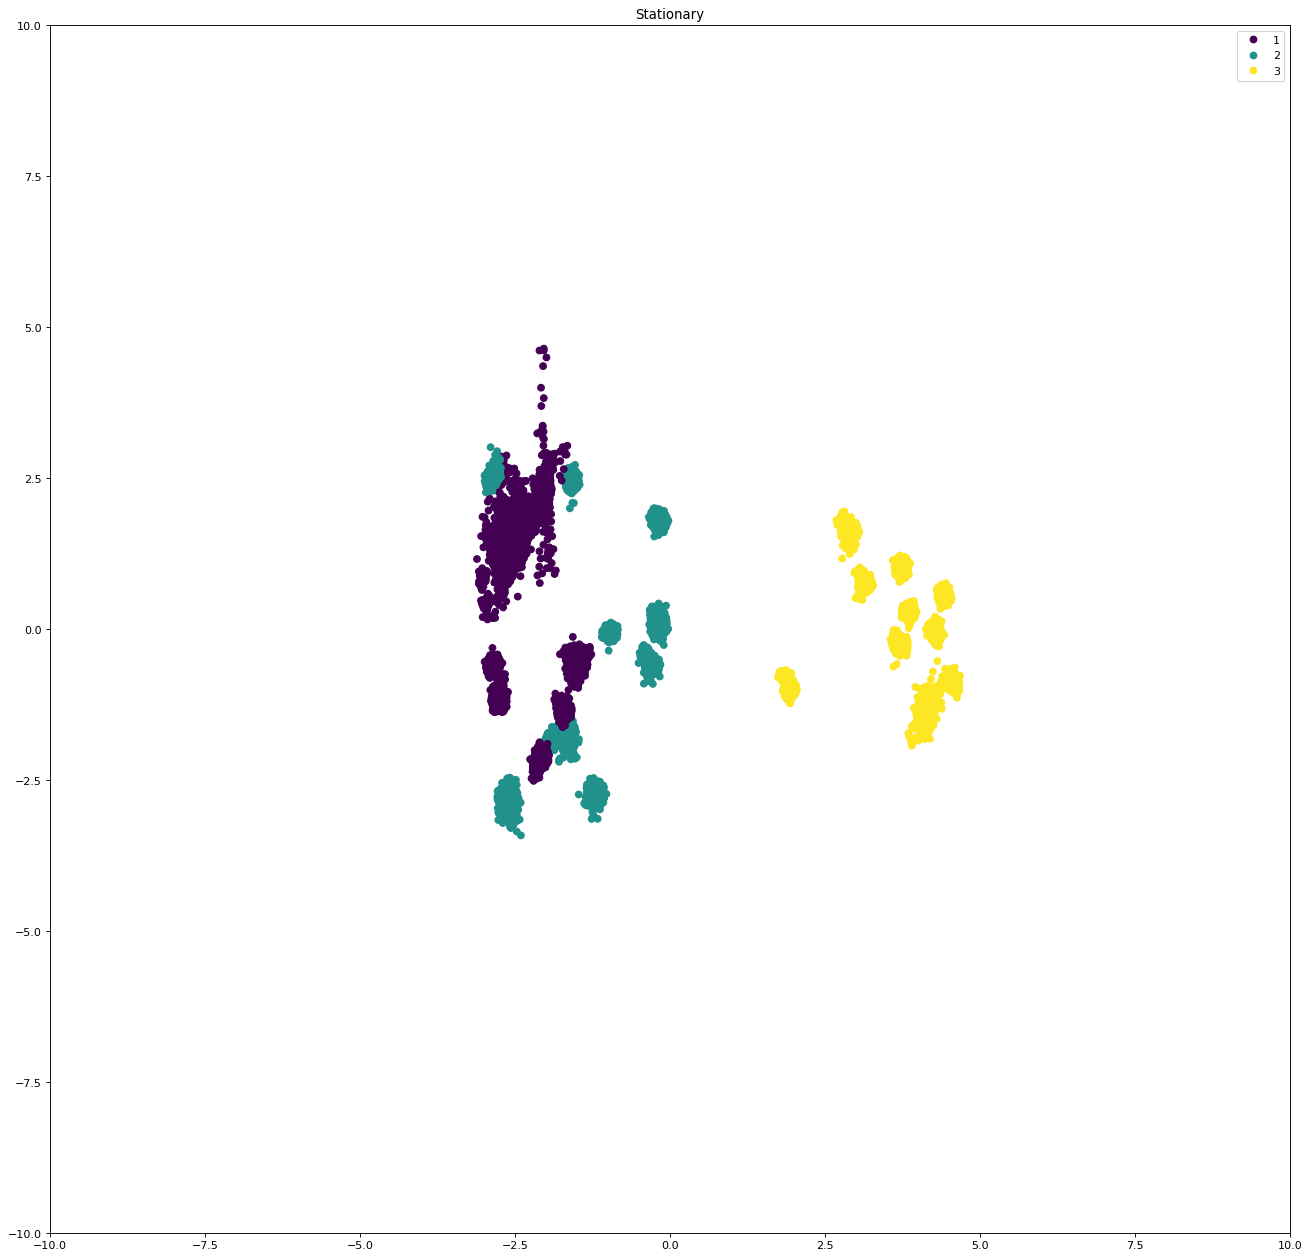

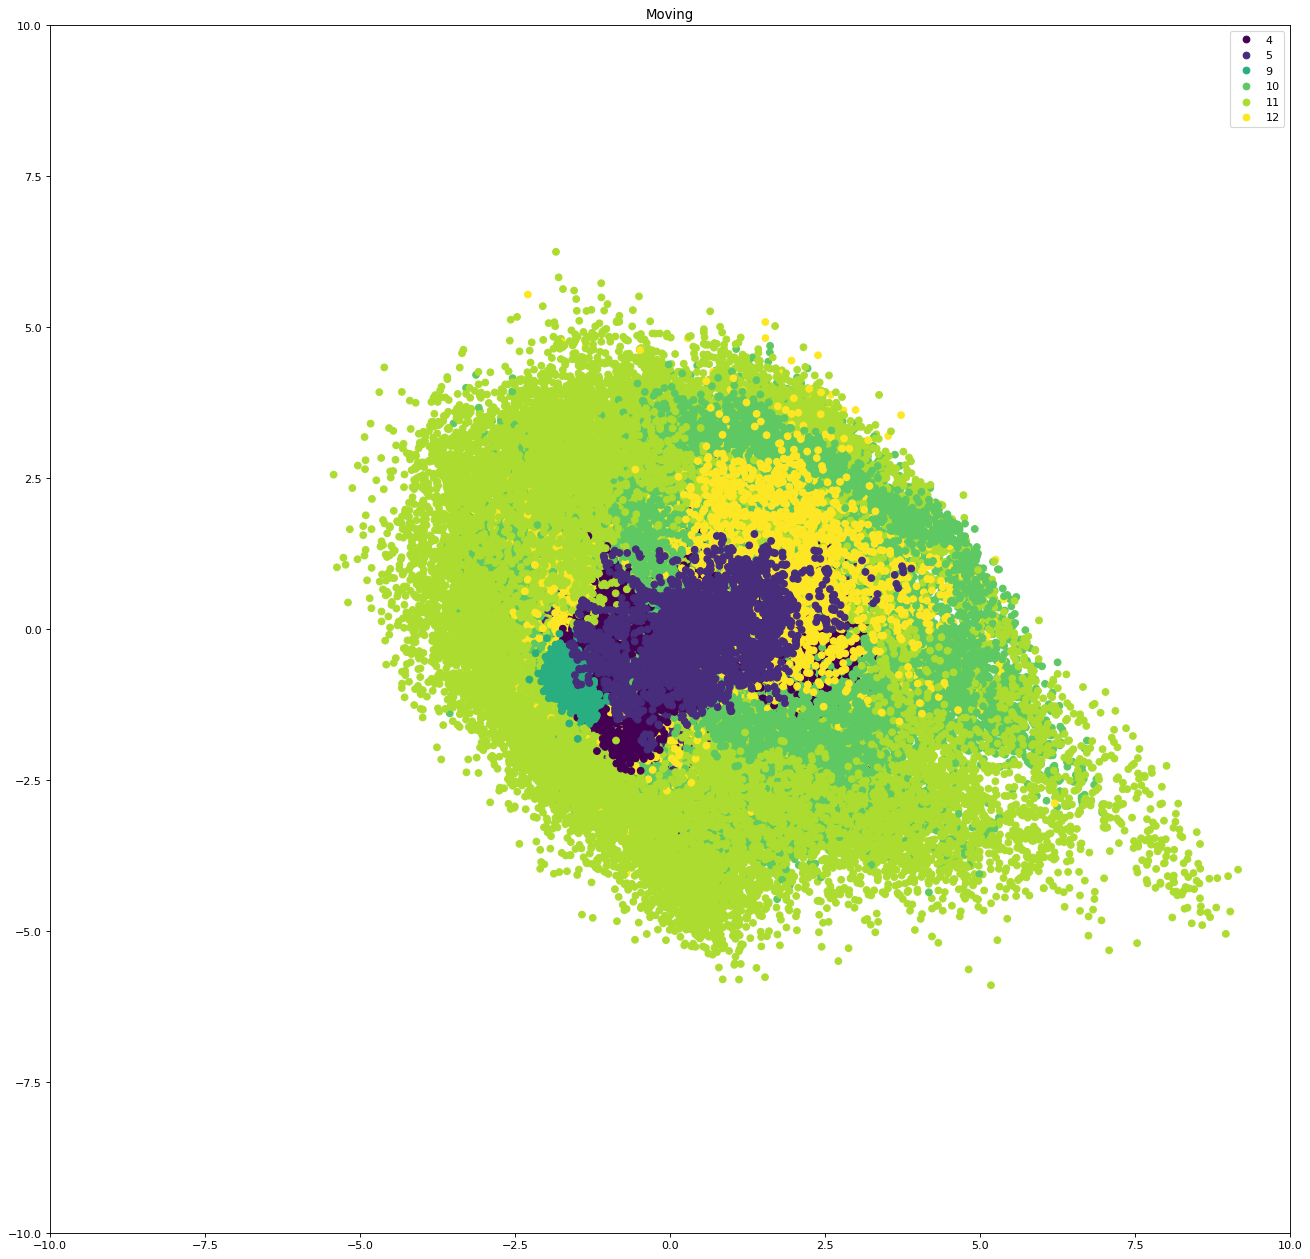

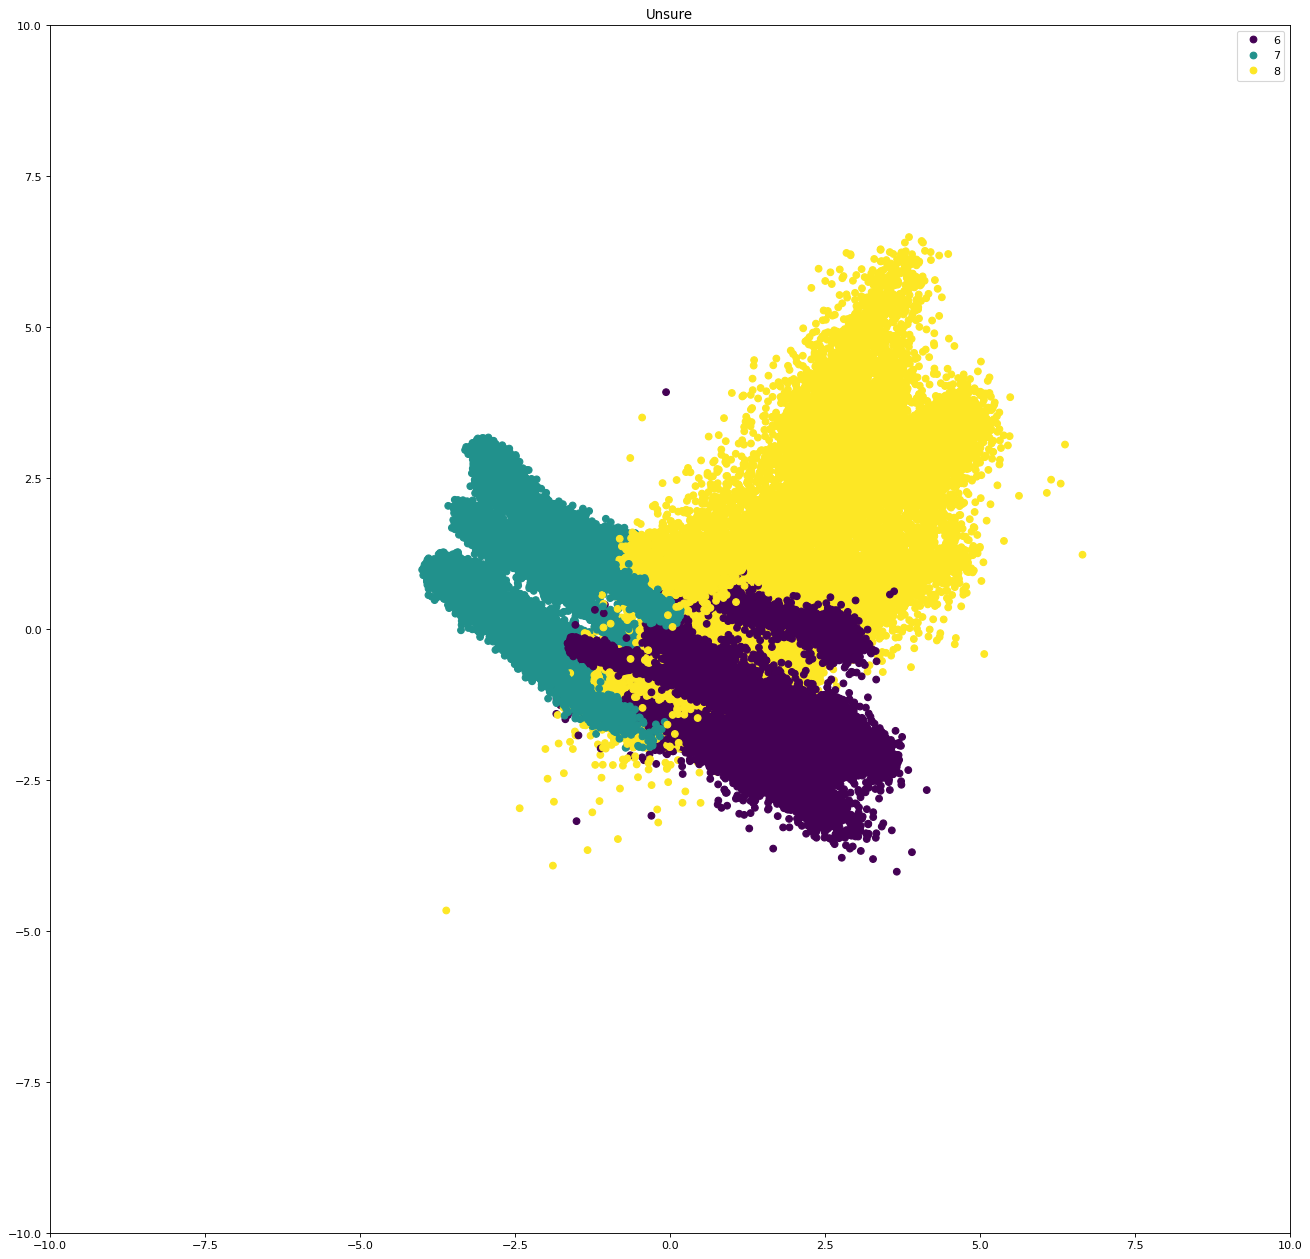

In [61]:
df = df.copy()
def get_0(df):
    return df[df['activity'] == 0]

def drop_0(df):
    return df[df['activity'] != 0]

def get_1_2_3(df):
    return df.loc[df['activity'].isin([1, 2, 3])]

def get_4_5_9_10_11_12(df):
    return df.loc[df['activity'].isin([4, 5, 9, 10, 11, 12])]

def get_6_7_8(df):
    return df.loc[df['activity'].isin([6, 7, 8])]

def pca(df, title):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    X = StandardScaler().fit_transform(X)
#     print(np.mean(df), np.std(df))
    pca = PCA(2)
    X = pca.fit_transform(X)
    figure(figsize=(20, 20), dpi = 80)
    scatter = plt.scatter(X[:,0], X[:,1], c = y)
    labels = np.unique(y)
    handles = [plt.Line2D([],[],marker = 'o', ls = '', color = scatter.cmap(scatter.norm(yi))) for yi in labels]
    plt.legend(handles, labels)
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.title(title)
    plt.show()
    
    
def kmeans(df, title):
    pca = PCA(2)
 
    #Transform the data
    df = pca.fit_transform(df)
    kmeans = KMeans(n_clusters = 12)
 
    #predict the labels of clusters.
    label = kmeans.fit_predict(df)

    #Getting unique labels
    u_labels = np.unique(label)
    figure(figsize=(20, 20), dpi = 80)
    #plotting the results:
    for i in u_labels:
        plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    
    plt.legend()
    plt.title(title)
    plt.show()

    
df_0 = get_0(df)
pca(df_0, '0')

df_no_0 = drop_0(df)
kmeans(df, 'Kmeans all')
pca(df_no_0, 'All')

df_1_2_3 = get_1_2_3(df_no_0)
df_4_5_9_10_11_12 = get_4_5_9_10_11_12(df_no_0)
df_6_7_8 = get_6_7_8(df_no_0)

pca(df_1_2_3, 'Stationary')
pca(df_4_5_9_10_11_12, 'Moving')
pca(df_6_7_8, 'Unsure')

In [ ]:
edaX = df.drop(['activity'], axis = 1)
tsne = TSNE(init = 'pca', verbose = 1, perplexity = 50, n_jobs = -1).fit_transform(edaX)
sb.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = eda['activity'])
plt.title('t-SNE of each class')
plt.show()

/home/s2bashar/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1215745 samples in 0.006s...
